<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/EX_final_SVM_Primal_Class_Kernel_Necessity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo



In [52]:
!pip install pyomo
import numpy as np
from random import randint
import random
import time
from math import ceil
import matplotlib.pyplot as plt # Data visualization
from pyomo.environ import *
import numpy as np
import pandas as pd


!wget -N -q "https://github.com/thomasfork/ipopt_linux/raw/main/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
opt = SolverFactory('ipopt', executable='/content/ipopt')


In [76]:
df=pd.DataFrame()
N = 2000
special = [0]*10+[1,-0.9]

df['x1'] = [-1+2*random.random() for i in range(N)]
df['x2'] = [-1+2*random.random() for i in range(N)]

df['x1x2'] = df['x1']*df['x2']
df['d1'] = df['x1'] + 0.5*abs(df['x1']-df['x2'])
df['d2'] = df['x2'] + 0.5*abs(df['x1']-df['x2'])
df['d3'] = df['x2']+df['x1']
df['z'] = df['x1']**2 + df['x2']**2


Y = []
for i in range(N):
  y= 0 if (df.loc[i,'x1']**2 + df.loc[i,'x2']**2 > 1) else 1
  Y.append(y)
df['output'] = Y
df.describe()

,x1,x2,x1x2,d1,d2,d3,z,output
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.014714,0.009056,-0.011780,0.351231,0.345574,0.023770,0.659089,0.785500
std,0.575442,0.572701,0.333584,0.620686,0.614747,0.797045,0.429625,0.410578
min,-0.997673,-0.999733,-0.967721,-0.944723,-0.959795,-1.919590,0.000346,0.000000
25%,-0.491006,-0.472562,-0.184978,-0.116591,-0.101658,-0.526213,0.303580,1.000000
50%,0.029515,0.019169,-0.001071,0.289124,0.283669,0.025234,0.617953,1.000000
75%,0.510171,0.506526,0.172735,0.766715,0.762280,0.598267,0.948743,1.000000
max,0.999587,0.999644,0.946079,1.970504,1.966760,1.945505,1.935479,1.000000


# Clean the data

In [77]:
df

,x1,x2,x1x2,d1,d2,d3,z,output
0,-0.504415,0.020533,-0.010357,-0.241941,0.283008,-0.483881,0.254856,1
1,-0.287532,-0.466706,0.134193,-0.197945,-0.377119,-0.754238,0.300489,1
2,-0.565685,-0.587869,0.332549,-0.554594,-0.576777,-1.153555,0.665590,1
3,-0.959288,-0.322053,0.308941,-0.640670,-0.003435,-1.281341,1.023951,0
4,0.983828,0.527573,0.519041,1.211955,0.755700,1.511401,1.246250,0
...,...,...,...,...,...,...,...,...
1995,-0.744538,-0.610135,0.454268,-0.677336,-0.542933,-1.354673,0.926601,1
1996,-0.142480,-0.679543,0.096821,0.126052,-0.411011,-0.822023,0.482079,1
1997,0.865478,-0.164624,-0.142478,1.380529,0.350427,0.700854,0.776153,1
1998,0.465003,0.635825,0.295661,0.550414,0.721236,1.100828,0.620501,1


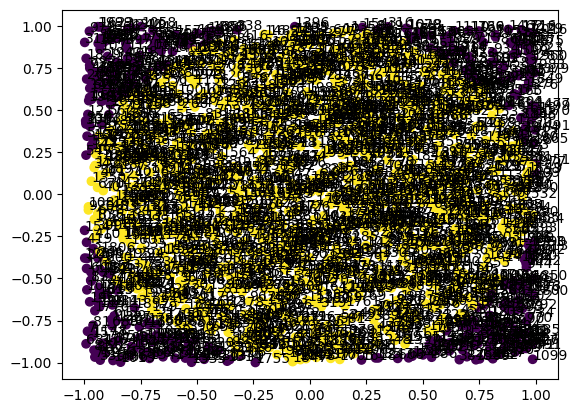

In [78]:
plt.scatter(df['x1'],df['x2'],c=df['output'])
for i in range(len(df)):
  plt.text(df.loc[i,'x1'],df.loc[i,'x2'],s=str(i))

In [79]:
J_set = [c for c in df.columns if c not in ["output"] ]

J_set

['x1', 'x2', 'x1x2', 'd1', 'd2', 'd3', 'z']

#Data Processing




In [80]:
df

,x1,x2,x1x2,d1,d2,d3,z,output
0,-0.504415,0.020533,-0.010357,-0.241941,0.283008,-0.483881,0.254856,1
1,-0.287532,-0.466706,0.134193,-0.197945,-0.377119,-0.754238,0.300489,1
2,-0.565685,-0.587869,0.332549,-0.554594,-0.576777,-1.153555,0.665590,1
3,-0.959288,-0.322053,0.308941,-0.640670,-0.003435,-1.281341,1.023951,0
4,0.983828,0.527573,0.519041,1.211955,0.755700,1.511401,1.246250,0
...,...,...,...,...,...,...,...,...
1995,-0.744538,-0.610135,0.454268,-0.677336,-0.542933,-1.354673,0.926601,1
1996,-0.142480,-0.679543,0.096821,0.126052,-0.411011,-0.822023,0.482079,1
1997,0.865478,-0.164624,-0.142478,1.380529,0.350427,0.700854,0.776153,1
1998,0.465003,0.635825,0.295661,0.550414,0.721236,1.100828,0.620501,1


In [81]:
J_set

['x1', 'x2', 'x1x2', 'd1', 'd2', 'd3', 'z']

In [82]:
n = len(df)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df.head(), len(test_df)

(            x1        x2      x1x2        d1        d2        d3         z  \
 1860 -0.553817  0.274201 -0.151857 -0.139808  0.688210 -0.279617  0.381900   
 353  -0.038377 -0.294275  0.011293  0.089572 -0.166326 -0.332652  0.088070   
 1333 -0.575606  0.092428 -0.053202 -0.241589  0.426445 -0.483178  0.339866   
 905  -0.270282 -0.544836  0.147259 -0.133005 -0.407559 -0.815118  0.369898   
 1289  0.602497 -0.121382 -0.073132  0.964437  0.240558  0.481116  0.377737   
 
       output  
 1860       1  
 353        1  
 1333       1  
 905        1  
 1289       1  ,
 400)

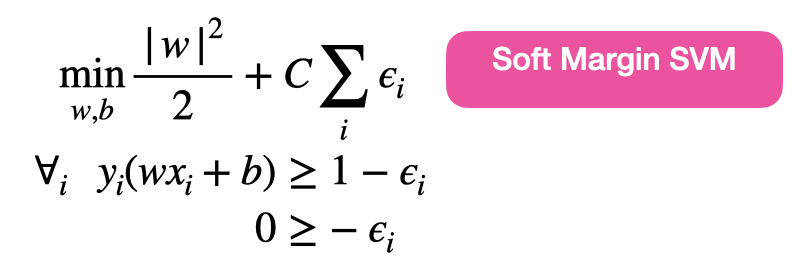

In [83]:
I_set = [i for i in train_df.index]
m = len(J_set)
Y={i:2*train_df.loc[i,"output"]-1 for i in I_set}

In [84]:
model = AbstractModel()
model.i = Set(initialize= I_set)
model.j= Set(initialize= J_set)
C = 0.5
def rule_x(model,i,j):
  return train_df.loc[i,j]
model.X = Param(model.i,model.j,initialize= rule_x, mutable = True)

model.w = Var(model.j, bounds=(-200,200), within=Reals)
model.beta = Var(bounds=(-300,300), within=Reals)

model.eps = Var(model.i, bounds=(0,200), within=Reals)

def rule_con1(model,i):
  return  Y[i]*( sum(model.w[j]*model.X[i,j] for j in model.j)+ model.beta) >= 1- model.eps[i]
model.con1= Constraint(model.i, rule=rule_con1)

def rule_of(model):
  return 0.5*sum(model.w[j]**2 for j in model.j) + C * sum(model.eps[i] for i in model.i)
model.obj = Objective(rule=rule_of, sense=minimize)
instance = model.create_instance()
st= time.time()
result = opt.solve(instance)
ft= time.time()
print("time", ft-st)
print("obj", value(instance.obj))

time 1.27504301071167
obj 95.68525030039591


In [85]:
error = 0
for i in test_df.index:
  actual = 2*test_df.loc[i,"output"]-1
  predict = sum(test_df.loc[i,j]*value(instance.w[j]) for j in instance.j) + value(instance.beta)
  if predict >=1:
    predict = 1
  else:
    predict = -1
  error += 1 if abs(actual-predict)>0 else 0
print("error", error/len(test_df))

error 0.07


In [86]:
value(instance.w['x1']),value(instance.w['x2']), value(instance.beta)

[value(instance.w[j]) for j in instance.j]


[0.12652504775586815,
 0.10508709851458886,
 -0.19246572610351936,
 -0.2886876591722761,
 -0.3101256084135584,
 0.23161214627046398,
 -7.631929679926302]

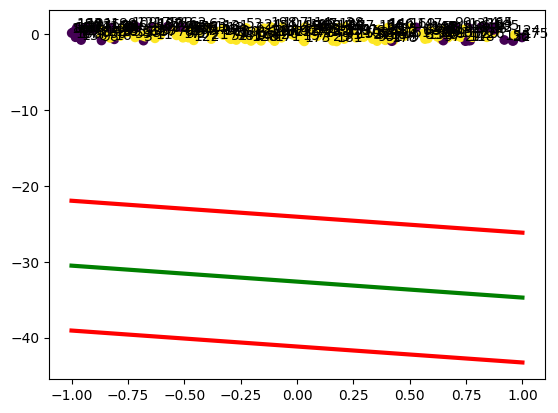

In [47]:
plt.scatter(df['x1'],df['x2'],c=df['output'])
#wx+b =1.  w[x1]*x1 + w[x2]*x2 + b = 0
#wx+b =-1
#wx+b =0
X = np.linspace(-1,1,100)

y1 = [(0-value(instance.beta)-value(instance.w['x1'])*x)/value(instance.w['x2'])  for x in X]
plt.plot(X,y1 , c= 'g', lw = 3)

y2 = [(1-value(instance.beta)-value(instance.w['x1'])*x)/value(instance.w['x2'])  for x in X]
plt.plot(X,y2 , c= 'r', lw = 3)


y3= [(-1-value(instance.beta)-value(instance.w['x1'])*x)/value(instance.w['x2'])  for x in X]
plt.plot(X,y3 , c= 'r', lw = 3)


for i in range(len(df)):
  plt.text(df.loc[i,'x1'],df.loc[i,'x2'],s=str(i))

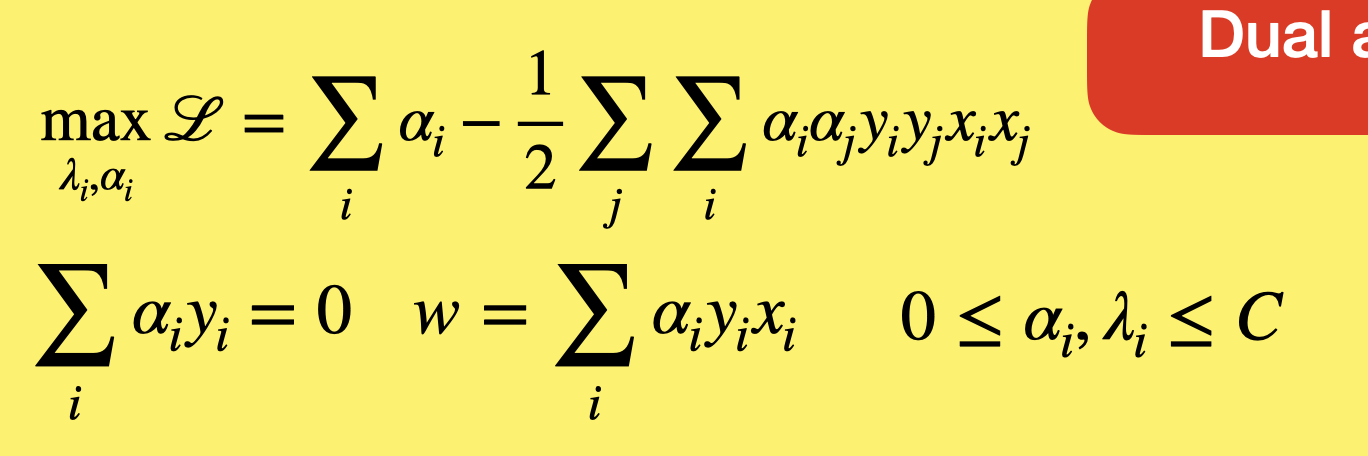

In [48]:
model = AbstractModel()
model.i = Set(initialize= I_set)
model.j= Set(initialize= J_set)
C = 0.5
def rule_x(model,i,j):
  return train_df.loc[i,j]
model.X = Param(model.i,model.j,initialize= rule_x, mutable = True)
model.alpha = Var(model.i, bounds=(0,C), within=Reals)

def rule_con1(model):
  return  sum(Y[i]*model.alpha[i] for i in model.i) == 0
model.con1= Constraint(rule=rule_con1)

def rule_of(model):
  return sum(model.alpha[i] for i in model.i) -0.5*sum(Y[i]*Y[ii]*model.alpha[i]*model.alpha[ii]*sum(model.X[i,j]*model.X[ii,j] for j in model.j) for i in model.i for ii in model.i )

model.obj = Objective(rule=rule_of, sense=maximize)
instance = model.create_instance()
st= time.time()
result = opt.solve(instance)
ft= time.time()
print("time", ft-st)
print("obj", value(instance.obj))

time 3.8409206867218018
obj 17.440798098523437


In [49]:
print("Total samples", len(I_set))
nonzero = 0
for i in instance.i:
  if value(instance.alpha[i])>0.01:
    print(i, value(instance.alpha[i]))
    nonzero+=1
print(f"Number of nonzero alpha = {nonzero}")


Total samples 160
122 0.4999999923954697
29 0.24384947930103046
86 0.5
114 0.5
173 0.5
98 0.48111231387560854
172 0.4999999977142509
97 0.5
90 0.49999997388584455
162 0.5
118 0.5
26 0.4999999939782624
139 0.5
187 0.5
27 0.07346184534702004
144 0.5
146 0.49999999937263484
0 0.5
198 0.5
28 0.5
40 0.1856674116047731
184 0.3749412765482373
147 0.5
39 0.5
168 0.5
3 0.5
105 0.5
133 0.49999992363762247
178 0.5
80 0.5
7 0.5
181 0.5
171 0.4999999905882894
17 0.5
175 0.5
134 0.5
63 0.5
107 0.5
50 0.5
196 0.4999999946691389
192 0.5
157 0.5
149 0.49999999552586166
103 0.5
99 0.5
87 0.4999997118808646
74 0.49999929303570995
106 0.5
Number of nonzero alpha = 48


$$Y_i(WX_i+b) =1$$  

3.190716496290177